In [1]:
import pandas as pd

urlSup = 'https://raw.githubusercontent.com/MDices/datasets/main/superheroes_nlp_dataset.csv'
super = pd.read_csv(urlSup, sep = ',')
super.head(5)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
super.shape

(1450, 81)

In [3]:
super.dtypes

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [4]:
super.columns

Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'ha

In [5]:
super = super.drop(["real_name", "full_name", "overall_score", "history_text", "powers_text", "superpowers", "creator", "alignment", "occupation", "base", "teams", "relatives", "gender", "type_race", "height", "weight", "eye_color", "skin_color", 'img', 'alter_egos',
       'aliases', 'place_of_birth', 'first_appearance', 'hair_color'], axis=1)

In [6]:
#super = super["name"].dropna()
super = super.dropna(subset=['name'])


In [7]:
super.shape

(1448, 57)

In [8]:
super_scores = super.loc[:, ['name', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']]
super_scores.head()

,name,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,85,30,60,60,40,70
1,514A (Gotham),100,20,30,50,35,100
2,A-Bomb,80,100,80,100,100,80
3,Aa,80,50,55,45,100,55
4,Aaron Cash,80,10,25,40,30,50


In [9]:
super_scores = super_scores.set_index('name')
#super = super.fillna(0)

In [10]:
# Coluna com a soma total (excluindo o userId)
super_scores['total'] = super_scores.iloc[:, 1:].sum(axis=1)
# Divide todas as colunas (exceto userId) pelo 'total'
super_scores.iloc[:,:] = super_scores.iloc[:,:].div(super_scores.total, axis=0)
# Podemos agora retirar o total
super_scores.drop('total', axis=1, inplace = True)
#super_scores.set_index('name', inplace = True)
super_scores.head(5)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
name,,,,,,
3-D Man,0.326923,0.115385,0.230769,0.230769,0.153846,0.269231
514A (Gotham),0.425532,0.085106,0.127660,0.212766,0.148936,0.425532
A-Bomb,0.173913,0.217391,0.173913,0.217391,0.217391,0.173913
Aa,0.262295,0.163934,0.180328,0.147541,0.327869,0.180328
Aaron Cash,0.516129,0.064516,0.161290,0.258065,0.193548,0.322581


In [11]:
super_scores = super_scores.fillna(0)

In [12]:
# Agrupamos usando K-Means
from sklearn.cluster import KMeans
# Vamos gerar 10 grupos de usuários
model = KMeans(n_clusters= 10)
model.fit(super_scores)
scores = model.predict(super_scores)
# Podemos sugerir para um usuário filmes que outros membros do grupo gostaram
super_scores.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
name,,,,,,
3-D Man,0.326923,0.115385,0.230769,0.230769,0.153846,0.269231
514A (Gotham),0.425532,0.085106,0.127660,0.212766,0.148936,0.425532
A-Bomb,0.173913,0.217391,0.173913,0.217391,0.217391,0.173913
Aa,0.262295,0.163934,0.180328,0.147541,0.327869,0.180328
Aaron Cash,0.516129,0.064516,0.161290,0.258065,0.193548,0.322581
Aayla Secura,0.321429,0.142857,0.160714,0.196429,0.196429,0.303571
Abe Sapien,0.301587,0.095238,0.111111,0.206349,0.317460,0.269841
Abin Sur,0.200000,0.240000,0.146667,0.173333,0.266667,0.173333
Abomination,0.182796,0.215054,0.172043,0.193548,0.215054,0.204301


In [13]:
#filtered_df = super_scores[super_scores['group'] == 2]
#filtered_df.head(20)

In [14]:
from sklearn.decomposition import PCA

# PCA (Principal Component Analysis: https://builtin.com/data-science/step-step-explanation-principal-component-analysis) com 2 componentes
# O correto seria verificar a melhor quantidade de componentes (exemplo: https://www.kaggle.com/code/jeanc2020/pca-clustering-kmeans)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(super_scores)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, index=super_scores.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = scores

df_pca.head()

,PC1,PC2,group
name,,,
3-D Man,0.025166,-0.111155,8
514A (Gotham),0.155120,-0.108092,6
A-Bomb,-0.158318,-0.063252,1
Aa,-0.082594,0.069979,8
Aaron Cash,0.215002,-0.042526,6


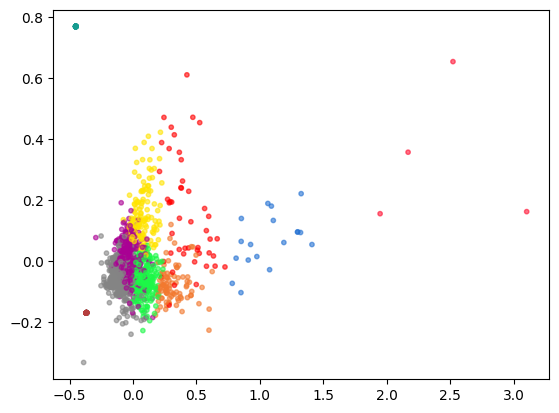

In [15]:
import matplotlib.pyplot as plt

colors = ['#FF0000', '#848484', '#ffe400', '#b53f3f', '#FF1234', '#f2792f', '#1cf847', '#2572D3', '#aa0094', '#169C90']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8], 9:colors[9]})

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha = 0.6, s=10)